Notes on [this litte paper](https://arxiv.org/abs/1807.03462).

Suppose we have a random variable $X$ with cumulative distribution function $F(x)$. Think about the following expectation.

\begin{align}
L_p(\theta) &= \mathbb{E}\left[\left| X-\theta \right|^p\right] \\
 &= \int_{-\infty}^{\theta} (\theta-x)^p dF + \int_{\theta}^{\infty} (x-\theta)^p dF
\end{align}

The minimum of $L_p$ gives us useful points in a distribution.

\begin{align}
\frac{\partial L_p}{\partial \theta} &= \int_{-\infty}^{\theta} p(\theta-x)^{p-1} dF - \int_{\theta}^{\infty} p(x-\theta)^{p-1} dF
\end{align}

\begin{align}
\frac{\partial L_p}{\partial \theta} = 0 \Rightarrow \int_{-\infty}^{\theta} (\theta-x)^{p-1} dF = \int_{\theta}^{\infty} (x-\theta)^{p-1} dF
\end{align}

For $p=2$:

\begin{align}
            &\int_{-\infty}^{\theta} (\theta-x) dF = \int_{\theta}^{\infty} (x-\theta) dF \\
\Rightarrow \qquad &\int_{-\infty}^{\infty} (x-\theta) dF = 0 \\
\Rightarrow \qquad &\theta = \int_{-\infty}^{\infty} x dF
\end{align}

This is the mean by definition.

For $p=1$:

\begin{align}
            &\int_{-\infty}^{\theta} dF = \int_{\theta}^{\infty} dF \\
\Rightarrow \qquad & F(\theta) = 1-F(\theta) \\
\Rightarrow \qquad & F(\theta) = \frac{1}{2}
\end{align}

This is the usual definition of the median.

Unlike the mean, this definition of the median is a bit troublesome, because there is not necessarily a single point which satisfies this equation. In particular, for an empirical distribution with an even number of samples, any point in the interval between the $(\frac{N}{2}-1)$th and $(\frac{N}{2}+1)$th point will do. This is the reason why at school we are taught the double definition for the sample median: The middle point if there are an odd number of points, and the midpoint of the two middle points if there are an even number of points. WTF!?

This paper has a way to generalize the definition of the median such that there is always a single unique value. Instead of minimizing $L_p$ with $p=1$, do it with $p=1+\epsilon$ for $\epsilon \rightarrow 0$.

\begin{align}
\int_{-\infty}^{\theta} (\theta-x)^{\epsilon} dF = \int_{\theta}^{\infty} (x-\theta)^{\epsilon} dF
\end{align}

Using Taylor:
\begin{align}
(x-\theta)^{\epsilon} &= \exp(\log(x-\theta))^{\epsilon} \\
                      &= \exp(\epsilon\log(x-\theta)) \\
                      &= 1 + \epsilon\log(x-\theta) + \mathcal{O}(\epsilon^2)
\end{align}

This gives:
\begin{align}
& \int_{-\infty}^{\theta} \left[ 1 + \epsilon\log(\theta-x) + \mathcal{O}(\epsilon^2) \right] dF = \int_{\theta}^{\infty} \left[ 1 + \epsilon\log(x-\theta) + \mathcal{O}(\epsilon^2) \right] dF \\
\Rightarrow \quad & F(\theta) + \epsilon \int_{-\infty}^{\theta} \log(\theta-x) dF + \mathcal{O}(\epsilon^2) = 1 - F(\theta) + \epsilon \int_{\theta}^{\infty} \log(x-\theta) dF + \mathcal{O}(\epsilon^2) \\
\Rightarrow \quad & 2F(\theta) - 1 + \epsilon \left[ \int_{-\infty}^{\theta} \log(\theta-x) dF - \int_{\theta}^{\infty} \log(x-\theta) dF \right]+ \mathcal{O}(\epsilon^2) = 0
\end{align}

If $2F(\theta) - 1 = 0$ has a unique solution then as $\theta$ will approach this in the limit as $\epsilon\rightarrow 0$. However, when ambiguity arises, the $\epsilon$ term acts as a tie-breaker.

In the empirical distribution case, $\theta$ will need to satisfy the following:

\begin{align}
\sum_{i \leq \frac{N}{2}} \log\left( \theta - x_i \right) = \sum_{i > \frac{N}{2}} \log\left( x_i - \theta \right)
\end{align}

We can try this out.

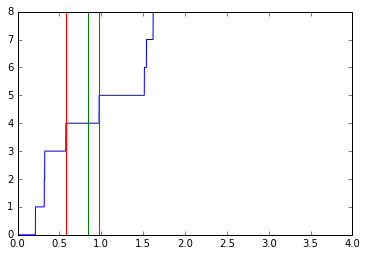

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

N = 8
seed = 1234

x_samples = stats.gamma.rvs(1, size=N, random_state=np.random.RandomState(seed))
x_samples.sort()

x_range = np.linspace(0, 4, 10000)
F = [(x_samples < x).sum() for x in x_range]

med_lower = x_samples[int(N/2-1)]
med_upper = x_samples[int(N/2)]

def Llog(theta):
    return np.log(theta-x_samples[:int(N/2)]).sum() - np.log(x_samples[int(N/2):]-theta).sum()

tiny_bit = 1E-10
med = optimize.brentq(Llog, med_lower+tiny_bit, med_upper-tiny_bit)

plt.plot(x_range, F)
plt.plot(med_lower*np.array([1,1]), [0,N], 'r')
plt.plot(med_upper*np.array([1,1]), [0,N], 'r')
plt.plot(med*np.array([1,1]), [0,N], 'g')
plt.show()


# Appendix

That derivative is not trivial. It relies on the following. Define:

\begin{align}
Q(\theta) &= \int_{-\infty}^{\theta} g(x,\theta) dF
\end{align}

Let's go.

\begin{align}
\frac{\partial Q}{\partial \theta} &= \lim_{\phi\rightarrow 0} \frac{1}{\phi}\left[ \int_{-\infty}^{\theta+\phi} g(x,\theta+\phi) dF - \int_{-\infty}^{\theta} g(x,\theta) dF \right] \\
&= \lim_{\phi\rightarrow 0} \frac{1}{\phi}\left[ \int_{-\infty}^{\theta+\phi} \left[ g(x,\theta) + \phi  h(x, \theta) + \mathcal{O}(\phi^2) \right] dF - \int_{-\infty}^{\theta} g(x,\theta) dF \right] \\
&= \lim_{\phi\rightarrow 0} \frac{1}{\phi}\left[ \int_{-\infty}^{\theta} \left[ g(x,\theta) + \phi h(x, \theta) + \mathcal{O}(\phi^2) \right] dF + \int_{\theta}^{\theta+\phi} \left[ g(x,\theta) + \phi h(x, \theta) + \mathcal{O}(\phi^2) \right] dF - \int_{-\infty}^{\theta} g(x,\theta) dF \right] \\
&= \lim_{\phi\rightarrow 0} \frac{1}{\phi}\left[ \phi \int_{-\infty}^{\theta} h(x, \theta) dF + \int_{\theta}^{\theta+\phi} \left[ g(x,\theta) + \phi h(x, \theta) \right] dF + \mathcal{O}(\phi^2) \right] \\
&= \lim_{\phi\rightarrow 0} \frac{1}{\phi}\left[ \phi \int_{-\infty}^{\theta} h(x, \theta) dF + \left[ g(\theta,\theta) + \phi h(\theta, \theta) \right] \int_{\theta}^{\theta+\phi}dF + \mathcal{O}(\phi^2) \right] \\
\end{align}

Where:

\begin{align}
h(x, \theta) &= \left.\frac{\partial g(x,y)}{\partial y}\right|_{y=\theta}
\end{align}

To finish off, notice that our $g$ has the convenient property that $g(\theta,\theta)=0$, so for this special case, we can carry on.

\begin{align}
\frac{\partial Q}{\partial \theta} &= \lim_{\phi\rightarrow 0} \frac{1}{\phi}\left[ \phi \int_{-\infty}^{\theta} h(x, \theta) dF + \mathcal{O}(\phi^2) \right] \\
&= \int_{-\infty}^{\theta} h(x, \theta) dF
\end{align}

Gosh, I can still do calculus.